# Homework 1 (80 pts)

Problems have different cost.

Write your answers in jupyter notebook format using $\LaTeX$ capabilities **(strongly recommended)** (or just simple ```tex``` manuscript, **less recommended**), or write it down on the paper, scan it and submit **(not recommended)**. A python code should be implemented in jupyter notebook format.

## Problem 1 (14 pts)

Let $\xi$ be some random variable with CDF $F(x)$.
-  **(10 pts)**. In which cases the random variable
$$
\eta =F(\xi)
$$
has uniform distribution ($\eta\sim \mathcal U(0,1)$)?
Prove your answer.
-  **(4 pts)**. Prove that in all other cases the statment does not hold (or that there are not other cases).

## Problem 2 (23 pts)
Consider the random variable $\xi$ which is generated as follows.

Another random variable $\eta$ which has discrete distribution


|r.v. $\eta$||1|2|3|
|----|---|----|---|
|probability $p$||0.2|0.3|0.5|

is sampled.

If the value of $\eta$ equals $1$ then $\xi$ is sampled uniformly from the interval $(-1,0)$.<br>
If the value of $\eta$ equals $2$ then $\xi$ is sampled uniformly from the interval $(1,3)$.<br>
If the value of $\eta$ equals $3$ then $\xi$ is taken as $2$ or $4$ with equal probability.

* **(5 pts)**. Plot the CDF of the random variable $\xi$.

* **(8 pts)**. Write a Python function that returns an inverse value of CDF.

* **(10 pts)**. Write python function to generate samples of $\xi$ using *inverse sampling method*.



## Problem 3 (18 pts)

We can use the results of Problem 1 to check the distribution of the samples. Namely, if the set $\{x_1,\,x_2,\,\ldots,\,x_n\}$ is sampled from a general population with CDF $F(x)$, then $F(x_1),\,F(x_2),\,\ldots,\,F(x_n)$ are sampled uniformly and we can check this using empirical histogram.
Consider the example with normal distribution $\mathcal N(1, 3)$

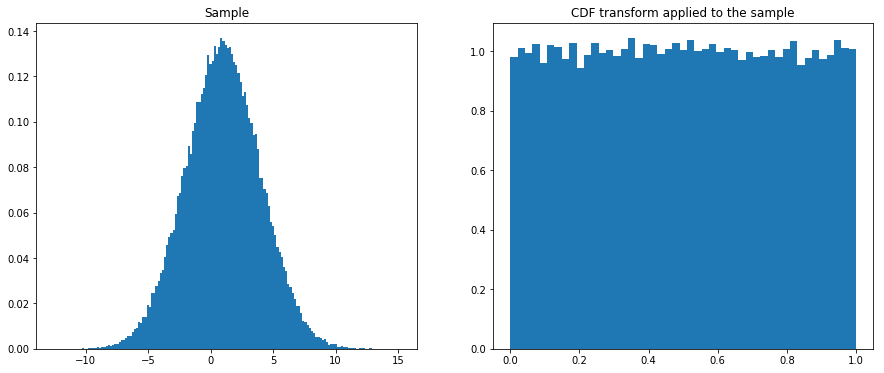

In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

n = int(1e5)
samples = norm.rvs(loc=1, scale=3, size=n)
samples_inv = norm.cdf(samples, loc=1, scale=3)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(samples    , bins='auto', density=True);
ax1.set_title('Sample')
ax2.hist(samples_inv, bins='auto', density=True);
ax2.set_title('CDF transform applied to the sample');

Now, consider a set of i.i.d. random variables $\{\xi_i\}$, and a random variable $\eta$ which is equal to an average over $M$ variables $\{\xi_i\}$
$$
\eta = \frac1M\sum_{i=1}^M\xi_i.
$$
According to [Central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem),
the random variable $\eta$ converges in distribution to a normal (recall the conditions of the corresponding statement). 

Make a sample of the variable $\eta$ of a size $10^4$–$10^6$ for  different values of $M$, and show that the distribution of $\eta$ is close to a normal with use of the method described above, for the following random variables $\{\xi_i\}$

* **(6 pts)**. Bernoulli distribution $\mathbb P(\xi=0)=\frac13$, $\mathbb P(\xi=1)=\frac23$.
* **(6 pts)**. Distribution with CDF $F(x)=\frac12\bigl(1+\text{Erf}(\ln(x))\bigr)$ for $x>0$ and  $F(x)=0$ otherwise, where $\text{Erf}(x):=\frac2{\sqrt\pi}\int_0^x\exp(-\tau^2)\,d\tau$ is the [Error function](https://en.wikipedia.org/wiki/Error_function).
* **(6 pts)**. Distribution with CDF $F(x)=1-\frac1{x^2}$ for $x>1$ and $F(x)=0$ otherwise.

## Problem 4 (25 pts)

This problem is a part of *density estimation* problem.
We have a sample with unknown distribution and want to sample more.

There are several ways to solve this problem.
One of the way to sample is to approximate probability distribution by the histogram of the given sample with a fixed number of bins $n$.

The samples for this task are in the file ```hw_01.data.npz```

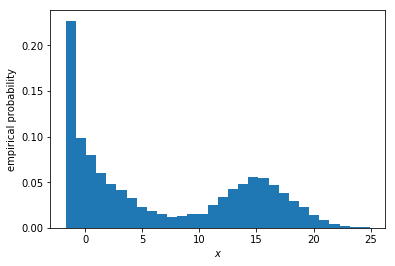

In [2]:
import numpy as np
samples = np.load('hw_01.data.npz')['samples']
plt.hist(samples, bins=30, density=True);
plt.xlabel('$x$');
plt.ylabel('empirical probability');

* **(10 pts)**. So, the first task is to write a Python function that sample random variable with the piecewise constant probability density function shown on the plot.
Check the result by building empirical histogram for the sample for a different number of bins $n$.

*Hint: use the Python code from the Lecture 2*

The second way of solving the density estimation problem is to use [empirical distribution function](https://en.wikipedia.org/wiki/Empirical_distribution_function) $\hat{F}$. This function is defined as
$$
\hat F(x):=\frac{\#\{x_i\colon x_i\leq x\}}N,
$$
where $\{x_i\}_1^N$ are the sample set, $N$ is the total number of the elements in it.

* **(10 pts)**. Write a python function to sample a random variable which has the CDF $\hat F$ build on the sample from the file ```hw_01.data.npz```. Check the result by building empirical histogram.

* **(5 pts)**. Explain the difference between these two ways of density estimation.<br> 
**NB:** (solution to this subproblem is counted only if two previous subproblems are done).